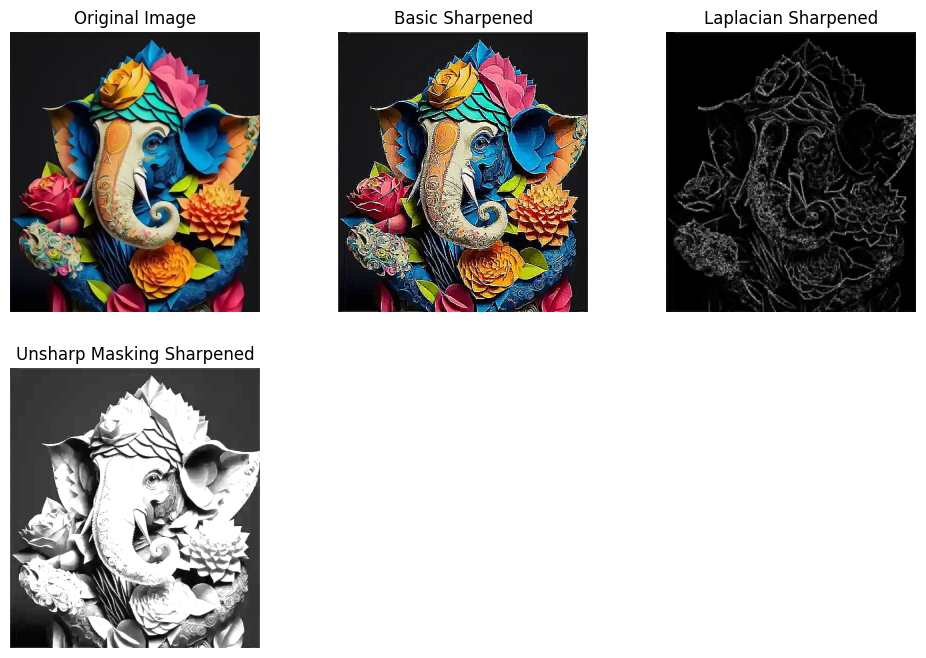

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Sharpening Kernel (Basic Sharpening Filter)
def sharpen_image_basic(image):
    # Define a basic sharpening kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    # Apply the kernel to the image using cv2.filter2D
    sharpened_image = cv2.filter2D(image, -1, kernel)

    return sharpened_image

# Laplacian Sharpening
def sharpen_image_laplacian(image):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Laplacian filter
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharpened_image = np.uint8(np.absolute(laplacian))

    return sharpened_image

# Unsharp Masking Sharpening
def sharpen_image_unsharp(image, sigma=1.5, strength=1.5):
    # Convert to grayscale if the image is in color
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Blur the image
    blurred = cv2.GaussianBlur(image, (0, 0), sigma)

    # Subtract the blurred image from the original to get the detail
    detail = cv2.subtract(image, blurred)

    # Add the detail back to the original image to sharpen
    sharpened_image = cv2.addWeighted(image, 1 + strength, detail, strength, 0)

    return sharpened_image

# Load an image (grayscale or color)
image = cv2.imread('/content/ganeshji.jpeg')

# Apply the different sharpening methods
sharpened_basic = sharpen_image_basic(image)
sharpened_laplacian = sharpen_image_laplacian(image)
sharpened_unsharp = sharpen_image_unsharp(image)

# Display the original and sharpened images
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image'), plt.axis('off')
plt.subplot(2, 3, 2), plt.imshow(cv2.cvtColor(sharpened_basic, cv2.COLOR_BGR2RGB)), plt.title('Basic Sharpened'), plt.axis('off')
plt.subplot(2, 3, 3), plt.imshow(sharpened_laplacian, cmap='gray'), plt.title('Laplacian Sharpened'), plt.axis('off')
plt.subplot(2, 3, 4), plt.imshow(sharpened_unsharp, cmap='gray'), plt.title('Unsharp Masking Sharpened'), plt.axis('off')
plt.show()
